## **Data Story**

**Introduction**

In this part of my report I'm going to describe the various steps I took in order to explore the data for my Capstone project. Exploring my dataset and asking questions will give me a better idea of what information I can extract from the data. Specifically, I am interested in different ways to split or categorize my data in order to inform my predictive model.

First, I’ll start by bringing in my dataset. and listing the different fields I have to work with.

In [2]:
import pandas as pd
import matplotlib
%matplotlib inline

data= pd.read_csv(r'C:\Users\anhem44\Data\cap1_training_data.csv')
data.dtypes

Unnamed: 0                         int64
DATE                              object
SELLER_COMPANY                    object
SELLER_COMPANY_OLD                object
C_BUYER_NAME                      object
C_BUYER_NAME_OLD                  object
Region                            object
Contract_Service_Agreement_id      int64
TR_CONTRACT_ID                     int64
loc                               object
TR_TIMEZONE                       object
TR_CLASS_NAME                     object
PRICEINDOLPERMWH                 float64
TR_DELV_SPEC_LOC                  object
TRADE_DATE                        object
HOUROFDAY                          int64
QUANTITYINMWH                    float64
HOURLYTRANSCHARGE                float64
HOUR_FREQ                          int64
weighted_pricemw                 float64
index_loc                        float64
index_bench                      float64
index_loc_seller                 float64
index_loc_oldseller              float64
transcharge     

In [3]:
data['TRADE_DATE'] = pd.to_datetime(data['TRADE_DATE']) 

Using the above list I'll start brainstomring some of the potential questions I could ask the data and which if these columns might contain the answer I'm interested in.

**Questions**

1. **Is there a realtionship between the amount traded and the period in time in which it is traded?**
    1. *Does more trading occur at different times of the day?* 
    * *Does more trading occur during days of the week?* 
    * *Does more trading occur during different months?*
    * *Does more trading occur during different defined FERC periods?* 
    * *Does more trading occur during different defined FERC seasons?* 
*  **Is there a realtionship between the amount traded and other variables?**
    1. *Does the amount being paid affect the quantity being traded?* 
    * *Are there spcific locations that have a higher trading volumn?*
    * *Who buys the most?*
    * *Who sells the most?*
* **Are there certain times of where energy is more expensive?**
    1. *Is it more expensive at certain times of day?*
    * *Is it more expensive at certain days of week?*
    * *Is it more expensive in certain months?*
    * *Is it more expensive in certain defined FERC periods?*
    * *Is it more expensive in certain defined FERC seasons?*
* **Is there a realtionship between the price and other variables?**    
    1. *Does the prices increase when there are more transactions in an hour?*
    * *Do certain companies sell their energy at higher prices?*
    * *Do certain companies pay more for their energy?*
    * *Is energy more expensive at certain locations?*
* **Does the period of time affect other variables** 
    1. *Is there more transactions per hour in a give defined FERC period?*
    * *Is there more transactions per hour in a give defined FERC season?*
    * *What percent of a companies sales take place during a given defined FERC period?*
    * *What percent of a companies purchases take place during a given defined FERC period?*
* **Are there any noticible trends in a variable that I could use to create buckets?**
    1. *Are there clear price buckets?* Price?
    * *Are there clear buckets in the amount being traded?*
    * *Are there clear buckets in where energy is being traded?*

**Work**

1(a) *Does more trading occur at different times of the day?*

I can find this out by looking at the relationship between QUANTITYINMWH and HOUROFDAY. 

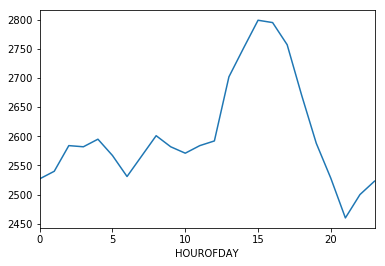

In [4]:
_1a_df = data[['QUANTITYINMWH','HOUROFDAY']] #subset the dataframe to the relevant columns
_1a_df = _1a_df.groupby(['HOUROFDAY']).size() #groupby hour
_1a_df.plot()

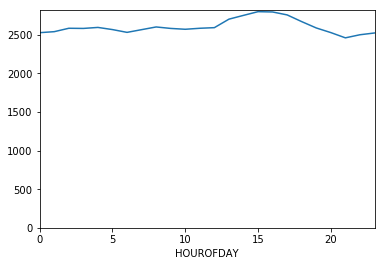

In [5]:
# According to the above plot it seems like there is a large relationship between the hour of the day and the volume traded. 
# However, the plot above may be deceiving because the y axis does not start at 0. So I will re-plot to see if there is an effect.

_1a_df.plot(ylim=0)

In [6]:
#this graph shows that there is a relationship between time of day,
#however, not as pronounced of a relationship as shown in the first graph.

1(b) *Does more trading occur during days of the week?*

I can find this out by looking at the relationship between QUANTITYINMWH and TRADE_DATE.

C:\Users\anhem44\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


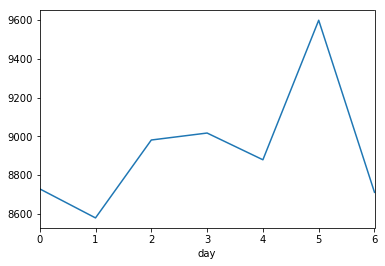

In [7]:
_1b_df = data[['QUANTITYINMWH']] #subset the dataframe to only have MWs
_1b_df['day'] = data['TRADE_DATE'].dt.weekday #add a column to show the day
_1b_df = _1b_df.groupby(['day']).size() #groupby day
_1b_df.plot()                  

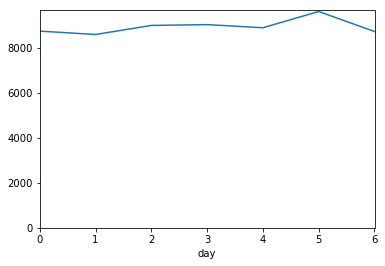

In [8]:
# Again, according to the above plot it seems like there is a large relationship between the day and the volume traded. 
# However, the plot above may be deceiving because the y axis does not start at 0. So I will re-plot to see if there is an effect.

_1b_df.plot(ylim=0)  

In [9]:
#this graph shows that there is a little relationship between day and amount traded,
#specifcally on Saturday

1(c) *Does more trading occur during different months?* 

I can find this out by looking at the relationship betwee QUANTITYINMWH and TRADE_DATE.dt.month.

C:\Users\anhem44\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


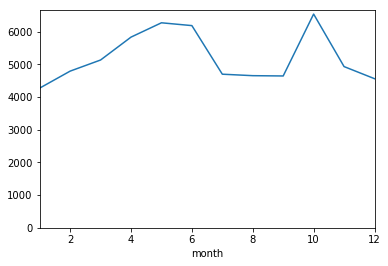

In [10]:
_1c_df = data[['QUANTITYINMWH']] #subset the dataframe to only have MWs
_1c_df['month'] = data['TRADE_DATE'].dt.month #add a column to show the month
_1c_df = _1c_df.groupby(['month']).size() #groupby month
_1c_df.plot(ylim=0) #set y to 0 automatically in order to avoid confusing graphs   

C:\Users\anhem44\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\anhem44\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


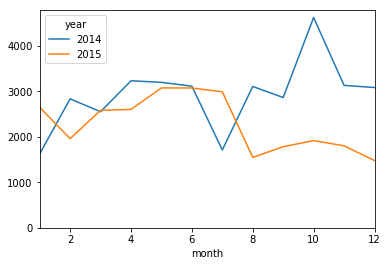

In [11]:
#this graph shows that there is a relationship between volumne and month
#specifically, it seems like trading slowly increases until june and then decreases.
#Then there is a large spike in October
#this leads to another question: does this pattern hold in both years?

_1c2_df = data[['QUANTITYINMWH']] #subset the dataframe to only have MWs
_1c2_df['year'] = data['TRADE_DATE'].dt.year#add a column to show the year
_1c2_df['month'] = data['TRADE_DATE'].dt.month #add a column to show the month 
_1c2_df = _1c2_df.groupby(['year','month']).size() #groupby year and month so I'll get each month's total
_1c2_df = _1c2_df.unstack('year') #unstack year so that I can have two lines on a plot
_1c2_df.plot(ylim=0) #set y to 0 automatically in order to avoid confusing graphs   

In [12]:
#this graph shows that there is a little relationship between month and amount traded,
#specifcally that summer appears to be a big trading time
#there appears to be a big spike in 2014 trading in October, probably due to oustide factors

1(d) *Does more trading occur during different defined FERC periods?*

I can find this out by looking at the relationship betwee QUANTITYINMWH and FERC_time.

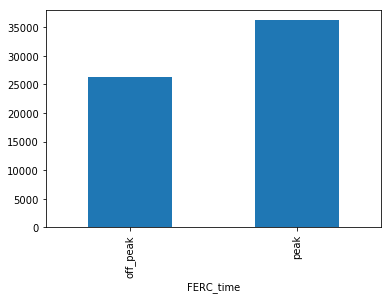

In [13]:
_1d_df = data[['QUANTITYINMWH','FERC_time']] #subset the dataframe to the relevant columns
_1d_df = _1d_df.groupby(['FERC_time']).size() #groupby FERC periods
_1d_df.plot(kind='bar')

In [14]:
#this graph shows that there is a large relationship between periods and amount traded,
#specifcally that peak is a big trading time

1(e) *Does more trading occur during different defined FERC seasons?* 

I can find this out by looking at the relationship betwee QUANTITYINMWH and FERC_season.

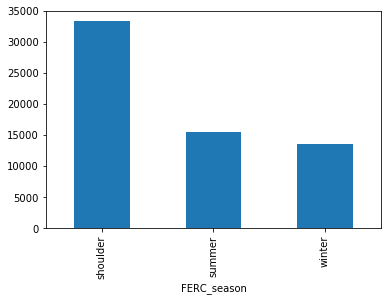

In [15]:
_1d_df = data[['QUANTITYINMWH','FERC_season']] #subset the dataframe to the relevant columns
_1d_df = _1d_df.groupby(['FERC_season']).size() #groupby FERC seasons
_1d_df.plot(kind='bar')

In [16]:
#this graph shows that there is a large relationship between seasons and amount traded,
#however it should be noted that shoulder contains 6 months while the other two contain 3 each
#were shoulder to be separated into two periods it would most likely be even with the others

2(a) *Does the amount being paid affect the quantity being traded?* 

I can find this out by looking at the relationship between QUANTITYINMWH and PRICEINDOLPERMWH.

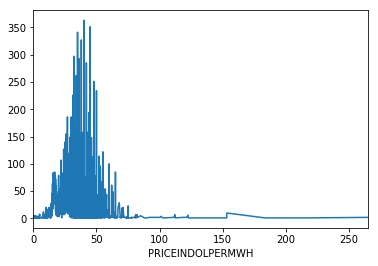

In [17]:
_2a_df = data[['QUANTITYINMWH','PRICEINDOLPERMWH']] #subset the dataframe to the relevant columns
_2a_df = _2a_df.groupby(['PRICEINDOLPERMWH']).size() #groupby price per MW
_2a_df.plot()

In [18]:
#this graph interestingly shows that price seems to be normally distibuted with a far right tail

2(b)*Are there spcific locations that have a higher trading volumn?* 

I can find this out by looking at the relationship between QUANTITYINMWH and TR_DELV_SPEC_LOC.

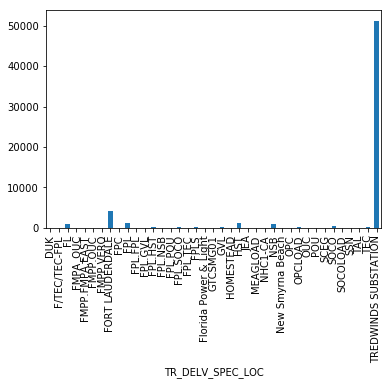

In [19]:
_2b_df = data[['QUANTITYINMWH','TR_DELV_SPEC_LOC']] #subset the dataframe to the relevant columns
_2b_df = _2b_df.groupby(['TR_DELV_SPEC_LOC']).size()
_2b_df.plot(kind='bar')

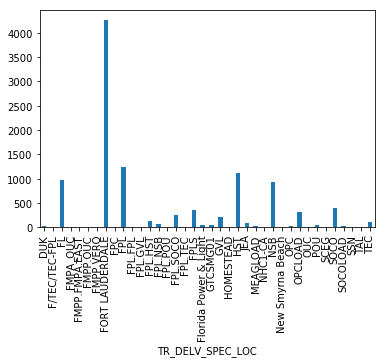

In [20]:
#without a doubt Tredwinds substation is the most active trading location
#this leads to the question of what the relationship of the others is without Tredwinds

_2b2_df = data[(data['TR_DELV_SPEC_LOC'] != 'TREDWINDS SUBSTATION' )]#remove all but Tredwinds
_2b2_df = _2b2_df[['QUANTITYINMWH','TR_DELV_SPEC_LOC']] #subset the dataframe to the relevant columns
_2b2_df = _2b2_df.groupby(['TR_DELV_SPEC_LOC']).size()
_2b2_df.plot(kind='bar')

In [21]:
#Fort Lauderdale is a distant second for trade location
#this shows that trading in FL is relatively isolated to a couple of locations

2(c) *Who buys the most?* 

I can find this out by looking at the relationship between QUANTITYINMWH and C_BUYER_NAME.

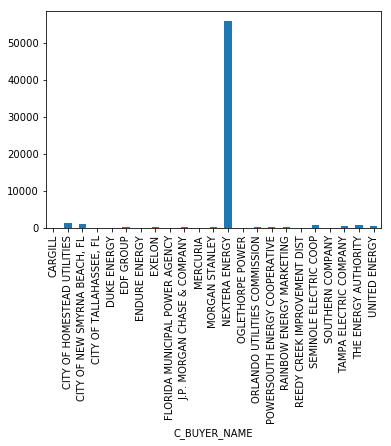

In [22]:
_2c_df = data[['QUANTITYINMWH','C_BUYER_NAME']] #subset the dataframe to the relevant columns
_2c_df = _2c_df.groupby(['C_BUYER_NAME']).size()
_2c_df.plot(kind='bar')

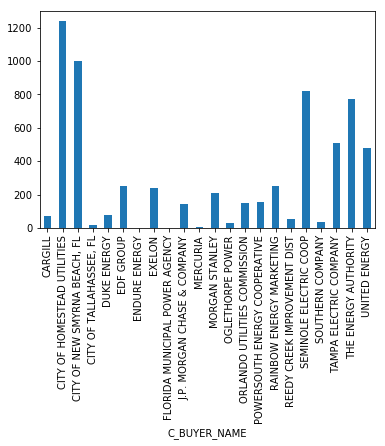

In [23]:
#without a doubt Nextera is the largest purchaser
#this leads to the question of what the relationship of the others without Nextera

_2c2_df = data[(data['C_BUYER_NAME'] != 'NEXTERA ENERGY' )] #remove all but Nextera
_2c2_df = _2c2_df[['QUANTITYINMWH','C_BUYER_NAME']] #subset the dataframe to the relevant columns
_2c2_df = _2c2_df.groupby(['C_BUYER_NAME']).size()
_2c2_df.plot(kind='bar')

In [24]:
#this shows that trading in FL is split pretty well among traders other than Nextera

2(d) *Who sells the most?* 

I can find this out by looking at the relationship between QUANTITYINMWH and SELLER_COMPANY.

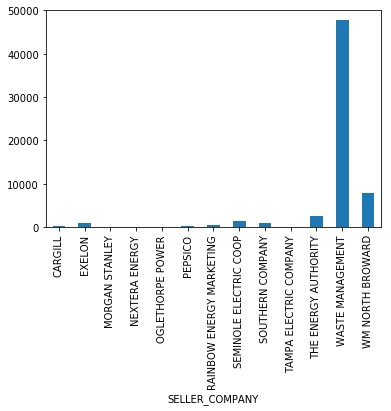

In [25]:
_2d_df = data[['QUANTITYINMWH','SELLER_COMPANY']] #subset the dataframe to the relevant columns
_2d_df = _2d_df.groupby(['SELLER_COMPANY']).size()
_2d_df.plot(kind='bar')

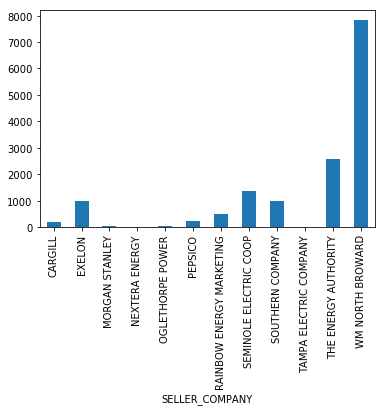

In [26]:
#without a doubt Waste Managment is the largest seller
#this leads to the question of what the relationship of the others without Waste Management

_2c2_df = data[(data['SELLER_COMPANY'] != 'WASTE MANAGEMENT' )] #remove all but Waste Management
_2c2_df = _2c2_df[['QUANTITYINMWH','SELLER_COMPANY']] #subset the dataframe to the relevant columns
_2c2_df = _2c2_df.groupby(['SELLER_COMPANY']).size()
_2c2_df.plot(kind='bar')

In [27]:
#WM North Nroward is second for seller
#There are very few other sellers in the area

3(a) *Is it more expensive at certain times of day?* 

I can find this out by looking at the relationship between PRICEINDOLPERMWH vs HOUROFDAY.

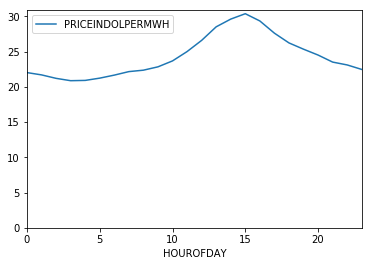

In [28]:
_3a_df = data[['HOUROFDAY','PRICEINDOLPERMWH']] #subset the dataframe to the relevant columns
_3a_df = _3a_df.groupby(['HOUROFDAY']).mean() #average price per hour
_3a_df.plot(ylim=0)

In [29]:
#power is more expensive around 3PM, which we know from 1a is also the time when the most power is being traded

3(b) *Is it more expensive at certain days of week?* 

I can find this out by looking at the relationship between PRICEINDOLPERMWH and TRADE_DATE.

C:\Users\anhem44\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


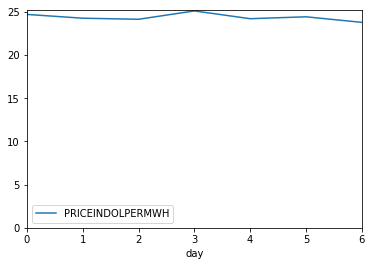

In [30]:
_3b_df = data[['PRICEINDOLPERMWH','TRADE_DATE']] #subset the dataframe to the relevant columns
_3b_df['day'] = _3b_df['TRADE_DATE'].dt.weekday
_3b_df = _3b_df.groupby(['day']).mean() #average price per day
_3b_df.plot(ylim=0)

In [31]:
#day has no large affect

3(c) *Is it more expensive in certain months?* 

I can find this out by looking at the relationship between PRICEINDOLPERMWH and TRADE_DATE.dt.month.

C:\Users\anhem44\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


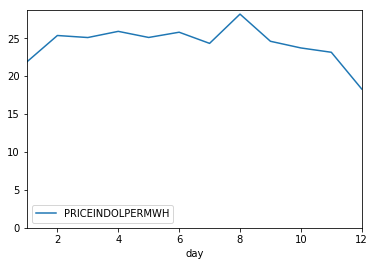

In [32]:
_3c_df = data[['PRICEINDOLPERMWH','TRADE_DATE']] #subset the dataframe to the relevant columns
_3c_df['day'] = _3c_df['TRADE_DATE'].dt.month
_3c_df = _3c_df.groupby(['day']).mean() #average price per month
_3c_df.plot(ylim=0)

In [33]:
#power is more expensive in the summer than in the winter

3(d) *Is it more expensive in certain defined FERC periods?*

I can find this out by looking at the relationship between PRICEINDOLPERMWH and FERC_time.

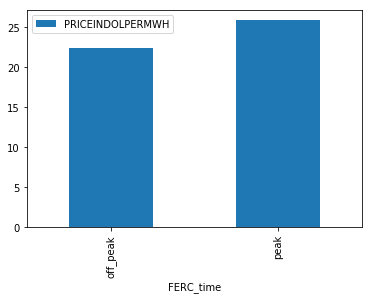

In [34]:
_3d_df = data[['PRICEINDOLPERMWH','FERC_time']] #subset the dataframe to the relevant columns
_3d_df = _3d_df.groupby(['FERC_time']).mean() 
_3d_df.plot.bar()

In [35]:
#power is more expensive during the peak time period

3(e) *Is it more expensive in certain defined FERC seasons?* 

I can find this out by looking at the relationship between PRICEINDOLPERMWH and FERC_season.

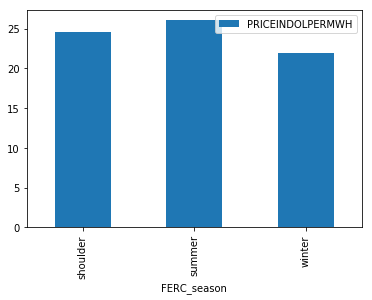

In [36]:
_3e_df = data[['PRICEINDOLPERMWH','FERC_season']] #subset the dataframe to the relevant columns
_3e_df = _3e_df.groupby(['FERC_season']).mean() 
_3e_df.plot.bar()

In [37]:
#power is more expensive in the summer than in the winter, consistent with other observations

4(a) *Does the prices increase when there are more transactions in an hour?* 

I can find this out by looking at the relationship between PRICEINDOLPERMWH and HOUR_FREQ.

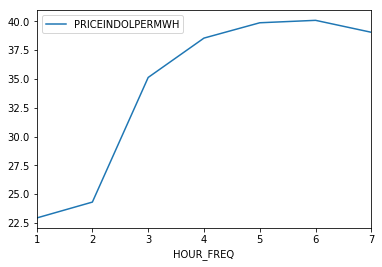

In [38]:
_4a_df = data[['PRICEINDOLPERMWH','HOUR_FREQ']] #subset the dataframe to the relevant columns
_4a_df = _4a_df.groupby(['HOUR_FREQ']).mean() 
_4a_df.plot()

In [39]:
#power becomes significantly more expensive when there are more transactions in an hour
#this leads to the question of whether there are particular time periods with more transactions

#days?

C:\Users\anhem44\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


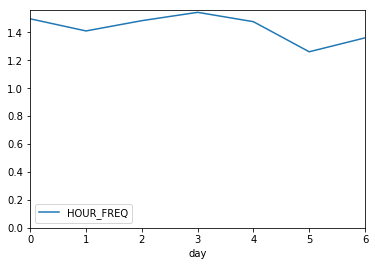

In [40]:
_4a1_df = data[['TRADE_DATE','HOUR_FREQ']] #subset the dataframe to the relevant columns
_4a1_df['day'] = _4a1_df['TRADE_DATE'].dt.weekday
_4a1_df = _4a1_df.groupby(['day']).mean() 
_4a1_df.plot(ylim=0)

In [41]:
#more during the week than the weekend

#month?

C:\Users\anhem44\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


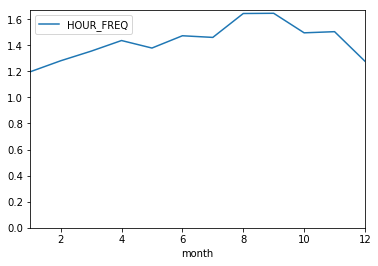

In [42]:
_4a2_df = data[['TRADE_DATE','HOUR_FREQ']] #subset the dataframe to the relevant columns
_4a2_df['month'] = _4a2_df['TRADE_DATE'].dt.month
_4a2_df = _4a2_df.groupby(['month']).mean() 
_4a2_df.plot(ylim=0)

In [43]:
#more in fall than in the other months

4(b) *Do certain companies sell their energy at higher prices?* 

I can find this out by looking at the relationship between PRICEINDOLPERMWH and SELLER_COMPANY.

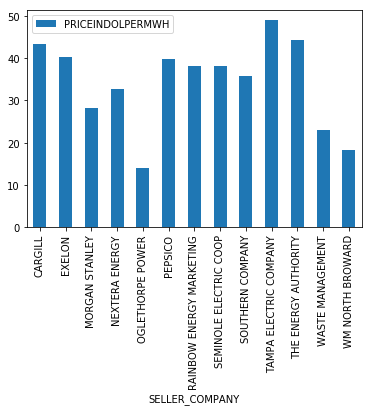

In [44]:
_4b_df = data[['PRICEINDOLPERMWH','SELLER_COMPANY']] #subset the dataframe to the relevant columns
_4b_df = _4b_df.groupby(['SELLER_COMPANY']).mean() 
_4b_df.plot.bar()

In [45]:
#certain companies appear to have very different average prices for their power

4(c) *Do certain companies pay more for their energy?* 

I can find this out by looking at the relationship between PRICEINDOLPERMWH and C_BUYER_NAME.

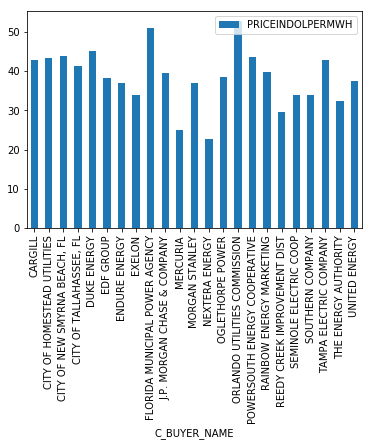

In [46]:
_4c_df = data[['PRICEINDOLPERMWH','C_BUYER_NAME']] #subset the dataframe to the relevant columns
_4c_df = _4c_df.groupby(['C_BUYER_NAME']).mean() 
_4c_df.plot.bar()

In [47]:
#certain companies appear to pay very different average prices for their power

4(d) *Is energy more expensive at certain locations?* 

I can find this out by looking at the relationship between PRICEINDOLPERMWH and TR_DELV_SPEC_LOC.

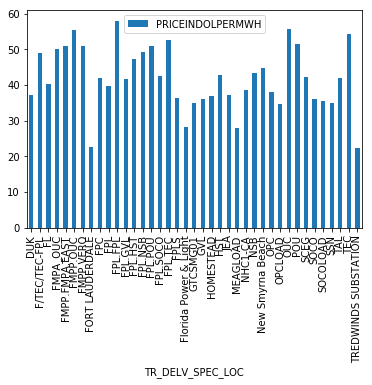

In [48]:
_4d_df = data[['PRICEINDOLPERMWH','TR_DELV_SPEC_LOC']] #subset the dataframe to the relevant columns
_4d_df = _4d_df.groupby(['TR_DELV_SPEC_LOC']).mean() 
_4d_df.plot.bar()

In [49]:
# prices seem to be cheaper at Trewwinds and FT Lauderdale, which is interesting as earlier we found those were the two biggest hubs

5(a) *Is there more transactions per hour in a give defined FERC period?* 

I can find this out by looking at the relationship between HOUR_FREQ and FERC_time.

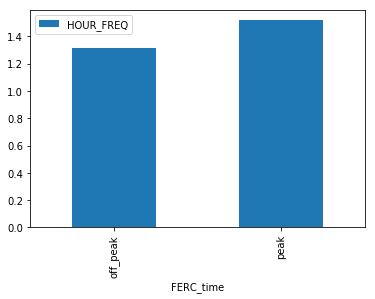

In [50]:
_5a_df = data[['HOUR_FREQ','FERC_time']] #subset the dataframe to the relevant columns
_5a_df = _5a_df.groupby(['FERC_time']).mean() 
_5a_df.plot.bar()

In [51]:
#slightly more during peak

5(b) *Is there more transactions per hour in a give defined FERC season?*

I can find this out by looking at the relationship between HOUR_FREQ and FERC_season.

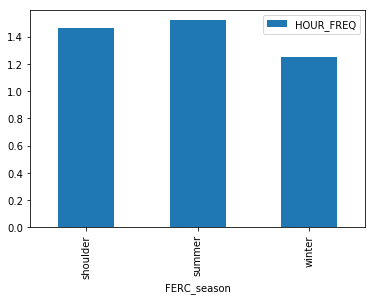

In [52]:
_5b_df = data[['HOUR_FREQ','FERC_season']] #subset the dataframe to the relevant columns
_5b_df = _5b_df.groupby(['FERC_season']).mean() 
_5b_df.plot.bar()

In [53]:
#most during summer, least during winter, consistent with other results

5(c) *What percent of a companies sales take place during a given defined FERC period?* 

I can find this out by looking at the relationship between SELLER_COMPANY, FERC_time, and QUANTITYINMWH.

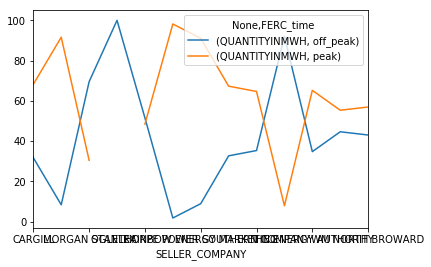

In [73]:
_5c_df = data[['SELLER_COMPANY','FERC_time','QUANTITYINMWH']] #subset the dataframe to the relevant columns
_5c_df = _5c_df.groupby(['SELLER_COMPANY','FERC_time']).agg({'QUANTITYINMWH': 'sum'}) #aggeregate total sales per period
_5c_df = _5c_df.groupby(level=0).apply(lambda x:100 * x / float(x.sum())) #calculate percent of sales per period
_5c_df  = _5c_df.unstack(['FERC_time'])
_5c_df.plot()

In [ ]:
#despite the bad format, it appears that sellers have a specific time period they sell in

5(d) *What percent of a companies purchases take place during a given defined FERC period?*

I can find this out by looking at the relationship between C_BUYER_NAME and FERC_season.

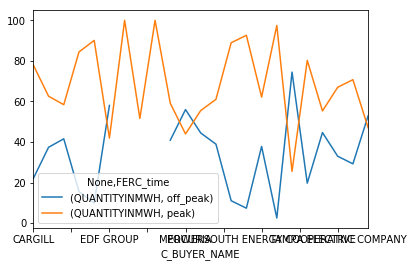

In [74]:
_5d_df = data[['C_BUYER_NAME','FERC_time','QUANTITYINMWH']] #subset the dataframe to the relevant columns
_5d_df = _5d_df.groupby(['C_BUYER_NAME','FERC_time']).agg({'QUANTITYINMWH': 'sum'}) #aggeregate total sales per period
_5d_df = _5d_df.groupby(level=0).apply(lambda x:100 * x / float(x.sum())) #calculate percent of sales per period
_5d_df  = _5d_df.unstack(['FERC_time'])
_5d_df.plot()

In [ ]:
#again,despite the bad format, it appears that sellers have a specific time period they buy during

**Discussion**

From the above work it is clear that a lot of variables affect the price even within the data. It appears that number of trades in an hour, hour of the day, and Seller are the most predictive of price in this data set.

Based on these conclusions I think that when assembling my data for the machine learning model it will be good to build the following binary matrices for the following:

* Time
    * Hour
    * Day
    * Month
    * FERC season
    * FERC period
    * Frequency of trading
* Location
* Entity
    * Entity as seller
    * Entity as purchaser

One very interesting thing that I might have to account for is the October price spike that occured in 2014. That was most likely due to factors not captured by this dataset and will most likely impact the effectivness of the predictive model for that particular time period.

Also interesting, was the normal distrbution of prices. This will be interesting to explore further when doing the hypotheis testing for this project in order to see if there are significant differences between subsets of prices (e.g. by time or location).